<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Read the data

Load the csv file and print the first five observations.

In [2]:
df1=pd.read_csv("C:/Users/sai/Desktop/New folder (10)/Day 2/diamond_data.csv")
df1.head()

,carat,cut,color,depth,table,price,x,y,z
0,0.30,Good,F,61.1,61.0,682,4.29,4.32,2.63
1,0.72,Ideal,H,62.0,56.0,2443,5.80,5.74,3.58
2,1.71,Premium,J,62.9,58.0,8848,7.64,7.58,4.79
3,1.01,Premium,E,59.2,59.0,7287,6.67,6.60,3.93
4,0.52,Ideal,D,62.7,56.0,1720,5.17,5.14,3.23


In [3]:
df1.shape

(1547, 9)

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 9 columns):
carat    1547 non-null float64
cut      1547 non-null object
color    1547 non-null object
depth    1547 non-null float64
table    1547 non-null float64
price    1547 non-null int64
x        1547 non-null float64
y        1547 non-null float64
z        1547 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 108.9+ KB


In [5]:
df1.isnull().sum()

carat    0
cut      0
color    0
depth    0
table    0
price    0
x        0
y        0
z        0
dtype: int64

In [ ]:
# There are no null values in the data.

Our objective is to predict the price of the diamond.

**The data definition is as follows:** <br>

**carat**: Weight of the diamond

**cut**: Quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color**: Diamond color

**depth**: Total depth percentage (it is calculated as: 2 * z / (x + y))

**table**: Width of top of the diamond relative to the widest point 

**price**: Price of a diamond in US dollars (target/dependent variable)

**x**: Length of a diamond in mm

**y**: Width of a diamond in mm

**z**: Depth of a diamond in mm

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Is the variable representing the width of a diamond skewed? If yes, apply an appropriate technique to make the distribution less skewed </b>
                </font>
            </div>
        </td>
    </tr>
</table>

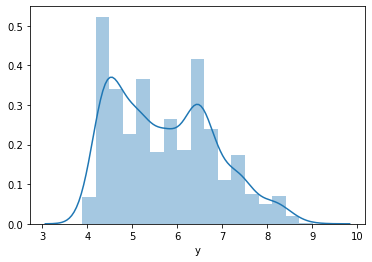

In [27]:
sns.distplot(df1['y'])
plt.show()

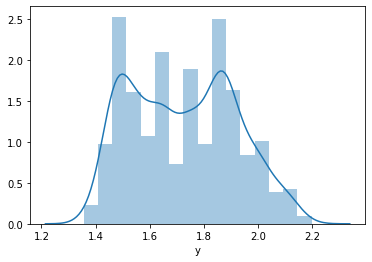

In [28]:
df1['y']=np.log(df1['y'])
sns.distplot(df1['y'])
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a full model and check whether the errors have a serial correlation or not</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
df=pd.get_dummies(df1,drop_first=True)
df.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J
0,0.30,61.1,61.0,682,4.29,1.463255,2.63,1,0,0,0,0,1,0,0,0,0
1,0.72,62.0,56.0,2443,5.80,1.747459,3.58,0,1,0,0,0,0,0,1,0,0
2,1.71,62.9,58.0,8848,7.64,2.025513,4.79,0,0,1,0,0,0,0,0,0,1
3,1.01,59.2,59.0,7287,6.67,1.887070,3.93,0,0,1,0,1,0,0,0,0,0
4,0.52,62.7,56.0,1720,5.17,1.637053,3.23,0,1,0,0,0,0,0,0,0,0


In [9]:
import statsmodels.api as sm

y=df['price']
x=df.drop(['price'],axis=1)

Xc = sm.add_constant(x)
model = sm.OLS(y,Xc).fit()
model.summary()

C:\Users\narendra\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     793.0
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:10:51   Log-Likelihood:                -13346.
No. Observations:                1547   AIC:                         2.673e+04
Df Residuals:                    1530   BIC:                         2.682e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.581e+04   9380.766      2.752      0.006    7412.328    4.42e+04
carat          1.101e+04    973.539     11.307      0.000    9097.855    1.29e+04
depth          -230.9771    123.861     -1.865      0.062    -473.933      11.978
table           -25.9078     20.757     -1.248      0.212     -66.623      14.807
x             -1182.2500    908.152     -1.302      0.193   -2963.605     599.105
y             -1.223e+04   4909.208     -2.490      0.013   -2.19e+04   -2595.584
z              3455.4057   2276.584      1.518      0.129   -1010.149    7920.960
cut_Good        746.4586    246.237      3.031      0.002     263.460    1229.457
cut_Ideal      1309.6178    247.394      5.294      0.000     824.350    1794.886
cut_Premium     938.1498    237.480      3.950      0.000     472.328    1403.971
cut_Very Good  1122.7265    239.079      4.696      0.000     653.769    1591.684
color_E         -13.0249    124.676     -0.104      0.917    -257.579     231.529
color_F         177.1105    125.462      1.412      0.158     -68.986     423.207
color_G         -33.4738    121.761     -0.275      0.783    -272.310     205.362
color_H        -607.8259    129.385     -4.698      0.000    -861.617    -354.035
color_I       -1028.3087    150.342     -6.840      0.000   -1323.208    -733.410
color_J       -1927.7371    180.195    -10.698      0.000   -2281.192   -1574.282
==============================================================================
Omnibus:                      448.006   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5662.942
Skew:                           0.983   Prob(JB):                         0.00
Kurtosis:                      12.165   Cond. No.                     2.57e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\narendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


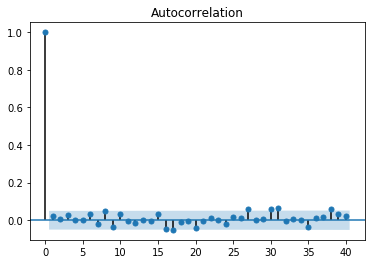

In [11]:
import statsmodels.tsa.api as smt
acf= smt.graphics.plot_acf(model.resid,lags=40)
acf.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Add the features one-by-one to obtain the set of features which explains the price of a diamond with the highest accuracy
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
# Forward selection 

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

sfs1 = sfs(lr,k_features=16,forward=True,scoring='r2')
sfs1.fit(x,y)

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          fixed_features=None, floating=False, forward=True,
                          k_features=16, n_jobs=1, pre_dispatch='2*n_jobs',
                          scoring='r2', verbose=0)

In [13]:
a=pd.DataFrame(sfs1.subsets_).T
a

,feature_idx,cv_scores,avg_score,feature_names
1,"(0,)","[0.8762829949804581, 0.8669378259743176, 0.855...",0.861186,"(carat,)"
2,"(0, 5)","[0.8834118629620207, 0.8802461032547032, 0.868...",0.870199,"(carat, z)"
3,"(0, 5, 15)","[0.8913075810938818, 0.886325436421043, 0.8742...",0.877765,"(carat, z, color_J)"
4,"(0, 5, 14, 15)","[0.8871631778975614, 0.8903240744152804, 0.880...",0.880616,"(carat, z, color_I, color_J)"
5,"(0, 2, 5, 14, 15)","[0.8875842536762171, 0.891817328785208, 0.8856...",0.883232,"(carat, table, z, color_I, color_J)"
6,"(0, 2, 5, 13, 14, 15)","[0.8911045141725183, 0.8907896057845884, 0.889...",0.885831,"(carat, table, z, color_H, color_I, color_J)"
7,"(0, 2, 5, 7, 13, 14, 15)","[0.891115303374301, 0.8918738122339652, 0.8895...",0.886088,"(carat, table, z, cut_Ideal, color_H, color_I,..."
8,"(0, 2, 4, 5, 7, 13, 14, 15)","[0.8918287639915703, 0.8920381227938726, 0.890...",0.886723,"(carat, table, y, z, cut_Ideal, color_H, color..."
9,"(0, 2, 4, 5, 7, 9, 13, 14, 15)","[0.8907321820339231, 0.8918847361415957, 0.891...",0.887265,"(carat, table, y, z, cut_Ideal, cut_Very Good,..."
10,"(0, 2, 4, 5, 7, 8, 9, 13, 14, 15)","[0.8907177499379262, 0.8922431162244513, 0.892...",0.887691,"(carat, table, y, z, cut_Ideal, cut_Premium, c..."


In [14]:
a[a['avg_score']==a['avg_score'].max()]

,feature_idx,cv_scores,avg_score,feature_names
11,"(0, 2, 4, 5, 6, 7, 8, 9, 13, 14, 15)","[0.8907502126104184, 0.8922220451342465, 0.893...",0.88821,"(carat, table, y, z, cut_Good, cut_Ideal, cut_..."


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Use the 4-fold cross validation method and compute the coefficient of determination for each model
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

y=df['price']
x=df.drop('price',axis=1)
cvs = cross_val_score(lr,x,y,cv=4,scoring='r2')
print("coefficient of determination for each model is:",cvs)

coefficient of determination for each model is: [0.87676429 0.89926719 0.89639842 0.86837947]


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Identify the most insignificant numerical variable among all the numeric variables in the data
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# check for low p-value among Numeric variables after OLS/LR model application
# or after RFE,variable having highest rank 

In [34]:
import statsmodels.api as sm

x=df1.drop(['price','color','cut'],axis=1)
y=df1['price']

Xc=sm.add_constant(x)
mod=sm.OLS(y,Xc).fit()
a=pd.DataFrame(mod.pvalues,columns=['p_value'])
a[a['p_value']==a['p_value'].max()]

,p_value
z,0.30766


In [30]:
x=df1.drop(['price','color','cut'],axis=1)
y=df1['price']
Xc=sm.add_constant(x)

from sklearn.feature_selection import RFE
rfe=RFE(lr,n_features_to_select=1,verbose=2)
rfe.fit(x,y)

Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=1, step=1, verbose=2)

In [31]:
pd.DataFrame(rfe.ranking_, index=x.columns, columns=['rank']).sort_values(by='rank')

,rank
carat,1
y,2
z,3
x,4
depth,5
table,6


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Do the residuals obtained from the full model follow a normal distribution?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

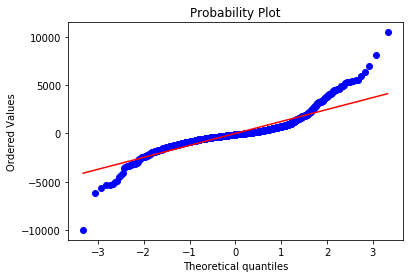

In [24]:
import statsmodels.api as sm
import scipy.stats as stats

y=df['price']
x=df.drop(['price'],axis=1)

Xc = sm.add_constant(x)
model = sm.OLS(y,Xc).fit()

residuals = model.resid

stats.probplot(residuals,plot=plt)
plt.show()

In [39]:
stats.jarque_bera(residuals)

(5662.941976630064, 0.0)

From above plot and jarque_bera results, we can say that the residuals are right-skewed and not doesn't follow a normal distribution.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Is it possible to make the residuals normal? If yes, do the needful
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
df1.head()

,carat,cut,color,depth,table,price,x,y,z
0,0.30,Good,F,61.1,61.0,682,4.29,1.463255,2.63
1,0.72,Ideal,H,62.0,56.0,2443,5.80,1.747459,3.58
2,1.71,Premium,J,62.9,58.0,8848,7.64,2.025513,4.79
3,1.01,Premium,E,59.2,59.0,7287,6.67,1.887070,3.93
4,0.52,Ideal,D,62.7,56.0,1720,5.17,1.637053,3.23


In [39]:
# Transform data 
df1_l=df1.drop(['cut','color'],axis=1).transform(lambda x: np.log(x))
df1_sr=df1.drop(['cut','color'],axis=1).transform(lambda x: np.sqrt(x))

In [40]:
x=df1_l.drop('price',axis=1)
X=pd.get_dummies(x,drop_first=True)
y=df1_l['price']
Xc=sm.add_constant(X)
model=sm.OLS(y,Xc).fit()
from scipy import stats
print(stats.jarque_bera(model.resid))

(32.76718413792407, 7.668251900128098e-08)


In [41]:
x=df1_sr.drop('price',axis=1)
X=pd.get_dummies(x,drop_first=True)
y=df1['price']
Xc=sm.add_constant(X)
model=sm.OLS(y,Xc).fit()
from scipy import stats
print(stats.jarque_bera(model.resid))

(4418.206983761983, 0.0)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Consider the full model and remove the variables one-by-one to obtain the set of seven most significant variables
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
x=df1.drop('price',axis=1)
X=pd.get_dummies(x,drop_first=True)
y=df1['price']
Xc=sm.add_constant(X)

from sklearn.feature_selection import RFE
rfe=RFE(lr,n_features_to_select=7,verbose=3)
rfe.fit(Xc,y)

Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=7, step=1, verbose=3)

In [44]:
pd.DataFrame(rfe.ranking_, index=Xc.columns, columns=['rank']).sort_values(by='rank')

,rank
cut_Ideal,1
cut_Very Good,1
cut_Premium,1
color_I,1
y,1
color_J,1
carat,1
cut_Good,2
color_H,3
z,4


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Identify the colors of a diamond that are not significant while predicting the price?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [46]:
# First Method

x=df1[['color']]
X=pd.get_dummies(x,drop_first=True)
y=df1['price']


from sklearn.feature_selection import RFE
rfe=RFE(lr,n_features_to_select=3,verbose=3)
rfe.fit(X,y)

Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=3, step=1, verbose=3)

In [48]:
pd.DataFrame(rfe.ranking_, index=X.columns, columns=['rank']).sort_values(by='rank')

,rank
color_H,1
color_I,1
color_J,1
color_E,2
color_G,3
color_F,4


In [54]:
# Second Method

y=df1['price']
x=df1['color']
x=pd.get_dummies(x,drop_first=True)

Xc = sm.add_constant(x)
model=sm.OLS(y,Xc).fit()
model.summary()

C:\Users\narendra\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\narendra\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\narendra\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\narendra\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\narendra\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Met

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     6.554
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           7.55e-07
Time:                        19:22:05   Log-Likelihood:                -15051.
No. Observations:                1547   AIC:                         3.012e+04
Df Residuals:                    1540   BIC:                         3.015e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3590.7087    283.805     12.652      0.000    3034.023    4147.395
E           -502.1820    373.622     -1.344      0.179   -1235.043     230.679
F              2.2073    375.635      0.006      0.995    -734.603     739.017
G            312.6099    364.537      0.858      0.391    -402.432    1027.652
H           1053.3814    385.418      2.733      0.006     297.382    1809.381
I           1326.7452    445.221      2.980      0.003     453.441    2200.049
J           1614.7079    527.327      3.062      0.002     580.353    2649.063
==============================================================================
Omnibus:                      447.468   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.050
Skew:                           1.626   Prob(JB):                    2.84e-220
Kurtosis:                       5.260   Cond. No.                         8.33
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a regression model on the five features obtained by eliminating the features recursively 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [55]:
# no_of_features _to_select = 5

y=df1['price']
x=df1.drop('price',axis=1)
X=pd.get_dummies(x,drop_first=True)

Xc=sm.add_constant(X)

rfe=RFE(lr,n_features_to_select=5,verbose=3)
rfe.fit(Xc,y)

Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=5, step=1, verbose=3)

In [56]:
pd.DataFrame(rfe.ranking_,index=Xc.columns,columns=['rank']).sort_values(by='rank')

,rank
cut_Ideal,1
color_I,1
y,1
color_J,1
carat,1
cut_Very Good,2
cut_Premium,3
cut_Good,4
color_H,5
z,6


In [ ]:
color_j,carat,x,y,z are 5 important features